# Assignment 1: Naive Bayes classification

In this assignment, we are given a dataset called 'travel-insurance.csv' to work on. We will use its attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.

Below is a picture describing our approach for this assignment.




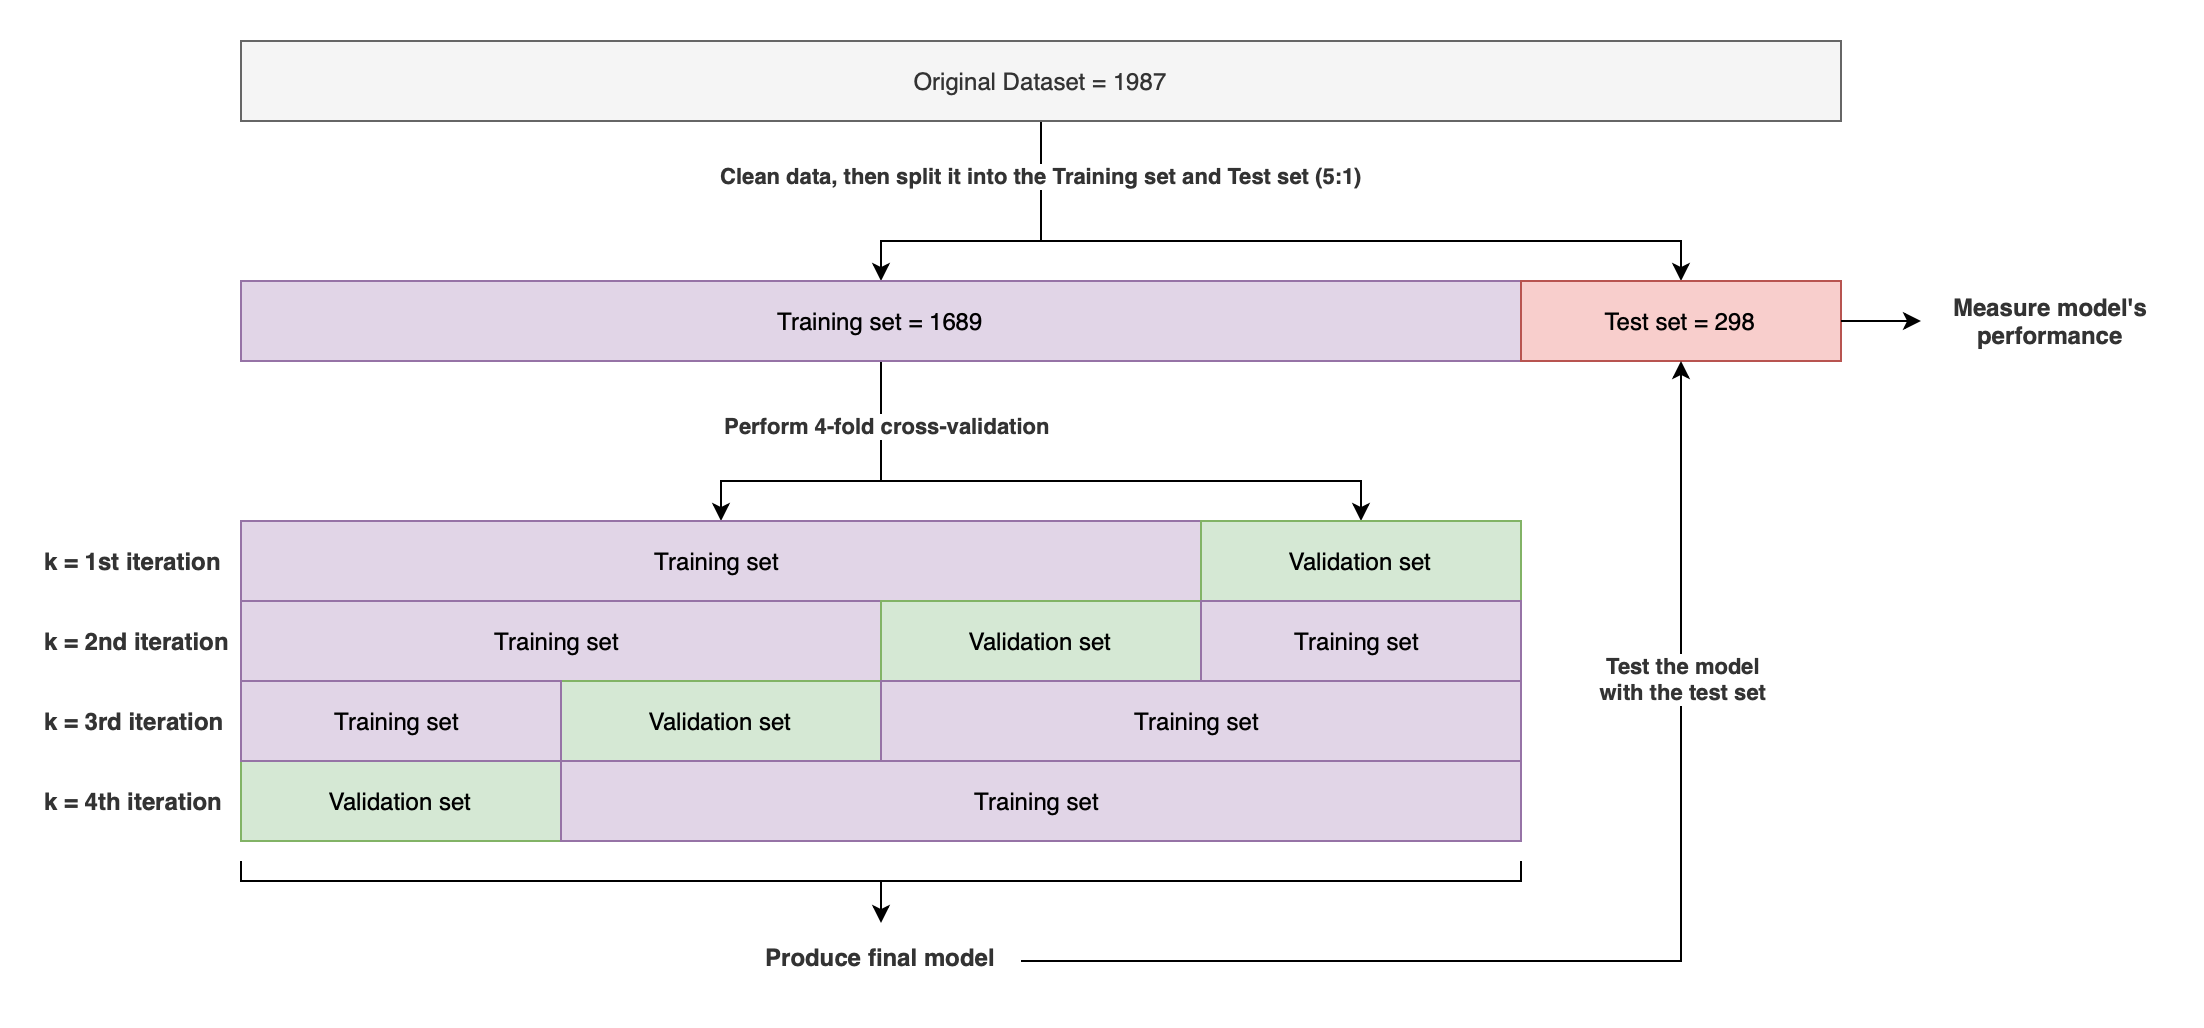

Specifically, we will:

1. Load the data.
2. Process the data.
3. Split train/test sets.
4. Train Gaussian Naive Bayes model and Mixed Naive Bayes model using the training set in two scenarios: with and without StandardScaler.
5. Compare the models using f1 score and choose the best one for testing.
6. Evaluate the model performance on the test set.

Let's get the ball rolling.

## Step 1: Data loading

First and foremost, we must import necessary libraries for the training, which are Pandas, Numpy, Scikit-learn, and Statistics. 

In [ ]:
# Load Python libraries
import pandas as pd
import numpy as n
import statistics as stats

# Load necessary functions from the Scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load Gaussian Naive Bayes and Mixed Naive Bayes models
from sklearn.naive_bayes import GaussianNB
!pip install mixed_naive_bayes --quiet
from mixed_naive_bayes import MixedNB

Then, we will load the given dataset `travel-insurance.csv` to this worksheet and read the loaded one using pandas. This dataset helps us predicting whether a user has travel insurance. To confirm that the data loading is successful, we will print out the dataset as following.

In [ ]:
# Load and display the dataset
df = pd.read_csv("travel-insurance.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
# Get some basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Some useful attributes in the dataset are:

* *Age*: the customer's age *(numeric)*
* *Employment Type*: the sector in which customer is employed *(categorical: Government Sector, Private Sector/Self Employed)*
* *GraduateOrNot*: whether the customer is college graduate or not *(categorical: Yes, No)*
* *AnnualIncome*: the yearly income of the customer in indian rupees *(numeric)*
* *FamilyMembers*: number of members in customer's family *(numeric)*
* *ChronicDisease*: whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc. *(categorical: 0 (no), 1 (yes))*
* *FrequentFlyer*: derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019). *(categorical: Yes, No)*
* *EverTravelledAbroad*: has the customer ever travelled to a foreign country. *(categorical: Yes, No)*
* *TravelInsurance* (label): did the customer buy travel insurance package during introductory offering held in the year 2019. *(categorical: 0 (no), 1 (yes))*

## Step 2: Data processing
Before processing the data, we will make a copy of the data to preserve the orginial one in case we did something inappropriately.

In [ ]:
# Make a data copy
data = df.copy()

There are columns such as `Unnamed: 0` not useful for our model building, so we will drop them. We will print the data to confirm that the removal is successful.

In [ ]:
# Drop "Unnamed: 0" column as it does not contain useful information for building the model
data = data.drop(columns=["Unnamed: 0"], axis=1)

# Show the dataframe
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Then, we will perform one hot encoding of the categorical data. Because we have 4 categorical attributes (Employment Type, GraduateOrNot, FrequentFlyer, and EverTravelledAboard), the new dataset will have 8 new dummy-variable columns instead of the old 4 categorical columns.

In [ ]:
# Peform one hot encoding of the given dataset on categorical columns
data = pd.get_dummies(data=data , columns=["Employment Type","GraduateOrNot","ChronicDiseases","FrequentFlyer", "EverTravelledAbroad"])

# Show the data with dummy variables
data

,Age,AnnualIncome,FamilyMembers,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,ChronicDiseases_0,ChronicDiseases_1,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,0,1,0,0,1,0,1,1,0,1,0
1,31,1250000,7,0,0,1,0,1,1,0,1,0,1,0
2,34,500000,4,1,0,1,0,1,0,1,1,0,1,0
3,28,700000,3,0,0,1,0,1,0,1,1,0,1,0
4,28,700000,8,0,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,1,0,1,0,1,1,0,0,1,0,1
1983,28,1750000,5,0,0,1,0,1,0,1,1,0,0,1
1984,28,1150000,6,0,0,1,0,1,0,1,1,0,1,0
1985,34,1000000,6,1,0,1,0,1,1,0,0,1,0,1


## Step 3: Data spliting
After cleaning the data, we will split the data into training set and test set. First, we will split the whole dataset into data feature set and data label set. Because we do not want the data labels to be leaked into the training and testing process, we will remove the column `TravelInsurance` from the data feature set.

In [ ]:
feature_names = data.columns.tolist()     # Get the list of data features from column names
feature_names.remove("TravelInsurance")   # Remove the label column "TravelInsurance" from the data features
X = data[feature_names].values            # Assign data feature values to variable X
y = data.TravelInsurance.values           # Assign data label values to variable y

We will print the shape of the data set, the data label set and the data feature set to confirm that our splitting is correctly done.

In [ ]:
print("Data's shape: ", data.shape)       # Show data shape
print("X's shape: ", X.shape)             # Show data feature shape
print("y's shape: ", y.shape)             # Show data label shape

Data's shape:  (1987, 14)
X's shape:  (1987, 13)
y's shape:  (1987,)


We say that our splitting is correctly done because:
- The number of rows in the pre-split dataset (1987) equals those in the data feature dataset and the data label dataset.
- The number of columns in the pre-split dataset (14) equals the sum of the number of columns in the data feature dataset (13) and the data label dataset (1).

We continually split the data label set and the data feature set into training and testing set, with the 5:1 ratio, so that the testing set accounts for 20% of the whole dataset.

In [ ]:
# Split the data into train/test set with 5:1 ratio using sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Then, we prepare the normalized data using StandardScaler. The StandardScaler's job is to standardize the given data by removing the mean and scaling them to the unit variance. We will do this to see the effect of StandardScaler on our model performance. However, we will only perform the normalization on numerical attributes, which are the 3 first columns, and leave the one-hot-encoded categorical attributes intact. This is because we do not want to quantify the categorical attributes.

In [ ]:
# Standardize the data with Standard scaler
normalizer = StandardScaler()

# Create a copy of our dataframe
X_normal_train = X_train.copy()
X_normal_test = X_test.copy()

# Since the datatype of the transformed value is a floating number, we have to
# change the datatype of the targeted numpy arrays to `float64`
X_normal_train = X_normal_train.astype('float64')
X_normal_test = X_normal_test.astype('float64')

# Fit and transform 3 first columns from the X_train dataset
train = X_normal_train[:,[0,1,2]]
train = normalizer.fit_transform(train)
X_normal_train[:,[0,1,2]] = train

# We will use the learned scaling parameters from the X_train's normalization to 
# normalize the X_test dataset
test = X_normal_test[:,[0,1,2]]
test = normalizer.transform(test)
X_normal_test[:,[0,1,2]] = test

## Step 4: Model trainings

We will use different methods to train our Naive Bayes model.

Because we want to understand the impact of StandardScalar on model training, we will train our model on 2 scenarios: with and without StandardScalar.

Since our dataset contains both discrete and continuous data, we can use either the Gaussian Naive Bayes model or the Mixed Naive Bayes model. However, we do not know which model has higher performance score. Therefore, each model will be cross-validated. We will do cross-validation 4 times for each scenarios because we want each validation set accounts for the same amount as the test set, which is 20% of the whole dataset. After that, the model that has higher score overall will be chosen and tested one more time on the test set.

But first, we must write a supporting function to print out a performance table.

In [ ]:
# Print out the given precision scores, recall scores, and f1 scores of a 4-fold
# cross-validation in a table-like format
def print_table(pre_lst, rec_lst, f1_lst):
  data = []
  headers = ["Precision score", "Recall score", "f1 score"]
  iters = ["1st", "2nd", "3rd", "4th", "Average"]

  # Add each iteration's score to the table
  for i in range(len(pre_lst)):
    data.append([pre_lst[i], rec_lst[i], f1_lst[i]])

  # Add the average score to the table
  data.append([stats.mean(pre_lst), stats.mean(rec_lst), stats.mean(f1_lst)])

  # Print data
  print(pd.DataFrame(data, iters, headers))

We will use cross-validation to minize the bias and subjectivity of the data. However, the library-provided `cross_val_score` function does not allow us to print out the precision score, recall score, and f1 score at the same time, so we will create our own 4-fold cross-validation function.

Our function will take in `clf`, `data_features`, `data_labels` and `num` (a random number that is distinct for each model training). The function will print out a table which contains the model's performance scores including precision, recall, and f1.

In [ ]:
# Print out the precision score, recall score, and f1 score of the 4-fold
# cross-validation on the trained model
def cross_validation(import_clf, data_features, data_labels, random_state_num):
  # Produce folds with a 3:1 ratio
  skfolds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = random_state_num)
  
  # Create new list for each performance score
  precision = []
  recall = []
  f1 = []

  # Perform the cross-validation 4 times
  for train_index, test_index in skfolds.split(data_features, data_labels):
    # Copy the model to maintain the original one intact
    clone_clf = clone(import_clf)

    # Assign data labels and data features
    X_train_folds = data_features[train_index]
    y_train_folds = data_labels[train_index]
    X_test_folds = data_features[test_index]
    y_test_folds = data_labels[test_index]

    # Train the model and make it do predictions
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)

    # Add performance scores into their corresponding list
    precision.append(precision_score(y_test_folds, y_pred))
    recall.append(recall_score(y_test_folds, y_pred))
    f1.append(f1_score(y_test_folds, y_pred))
  
  print_table(precision, recall, f1)

Since we have all the needed functions, we can start the training process. As mentioned earlier, we will train 2 different models (Gaussian Naive Bayes and Mixed Naive Bayes) in 2 scenarios (without StandardScaler and with StandardScaler).

### a. Gaussian Naive Bayes without StandardScalar
In this part, we will train the Gaussian Naive Bayes model without StandardScaler. First, we will initialize the Gaussian Naive Bayes.

In [ ]:
# Initialize the Gaussian Naive Bayes model
clf = GaussianNB()

Then, we will train that model using `X_train` as data features and `y_train` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 10 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.



In [ ]:
# Train the GNB model using X_train (data features) and y_train (data label),
# and output the model's performance score of 4 cross-validations
cross_validation(clf, X_train, y_train, 10)

         Precision score  Recall score  f1 score
1st             0.763158      0.580000  0.659091
2nd             0.676471      0.460000  0.547619
3rd             0.660870      0.510067  0.575758
4th             0.750000      0.503356  0.602410
Average         0.712625      0.513356  0.596219


From the table above, the average f1 score of this model is 0.596219. Since the f1 score takes into account both precision score and recall score with a weighted avergae, it will be less subjective. Therefore, we will use this number to compare with other models.

### b. Gaussian Naive Bayes with StandardScalar
In this part, we will train the Gaussian Naive Bayes model with StandardScaler. First, we will initialize the Gaussian Naive Bayes.

In [ ]:
# Re-initialize the Gaussian Naive Bayes model
clf = GaussianNB()

Then, we will train that model using `X_train` as data features and `y_train` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 11 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.

In [ ]:
# Train the GNB model using X_normal_train (data features) and y_train
# (data label), and output the model's performance score of 4 cross-validations
cross_validation(clf, X_normal_train, y_train, 11)

         Precision score  Recall score  f1 score
1st             0.672897      0.480000  0.560311
2nd             0.629921      0.533333  0.577617
3rd             0.658120      0.516779  0.578947
4th             0.625954      0.550336  0.585714
Average         0.646723      0.520112  0.575648


We will use the same score, which is the average f1 score, to compare with other models. From the table above, the average f1 score of this model is 0.575648.

### c. Mixed Naive Bayes without StandardScalar
In this part, we will train the Mixed Naive Bayes model without StandardScaler. First, we will initialize the Mixed Naive Bayes.

In [ ]:
# Initialize the Mixed Naive Bayes model and specify the indices of the
# features which are to follow the categorical distribution
clf = MixedNB(categorical_features=[3,4,5,6,7,8,9,10,11])

Then, we will train that model using `X_train` as data features and `y_train` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 12 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.

In [ ]:
# Train the MNB model using X_train (data features) and y_train (data label),
# and output the model's performance score of 4 cross-validations
cross_validation(clf, X_train, y_train, 12) 

         Precision score  Recall score  f1 score
1st             0.654206      0.466667  0.544747
2nd             0.681416      0.513333  0.585551
3rd             0.618321      0.543624  0.578571
4th             0.680672      0.543624  0.604478
Average         0.658654      0.516812  0.578337


We will use the same score, which is the average f1 score, to compare with other models. From the table above, the average f1 score of this model is 0.578337.

### d. Mixed Naive Bayes with StandardScalar
In this part, we will train the Mixed Naive Bayes model with StandardScaler. First, we will initialize the Mixed Naive Bayes.

In [ ]:
# Re-initialize the Mixed Naive Bayes model and specify the indices of the
# features which are to follow the categorical distribution
clf = MixedNB(categorical_features=[3,4,5,6,7,8,9,10,11])

Then, we will train that model using `X_train` as data features and `y_train` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 13 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.

In [ ]:
# Train the MNB model using X_normal_train (data features) and y_train
# (data label), and output the model's performance score of 4 cross-validations
cross_validation(clf, X_normal_train, y_train, 13)

         Precision score  Recall score  f1 score
1st             0.655462      0.520000  0.579926
2nd             0.707071      0.466667  0.562249
3rd             0.742268      0.483221  0.585366
4th             0.747664      0.536913  0.625000
Average         0.713116      0.501700  0.588135


We will use the same score, which is the average f1 score, to compare with other models. From the table above, the average f1 score of this model is 0.588135.

## Step 5: Models Comparison

Below is a table containing the average f1 score of all the trained models.

|  | Average f1 score |
| --- | --- |
| Gaussian Naive Bayes (in 2 cases) | 0.585934 |
| Gaussian Naive Bayes without StandardScaler | 0.596219 |
| Gaussian Naive Bayes with StandardScaler | 0.575648 |
| Mixed Naive Bayes (in 2 cases) | 0.583236 |
| Mixed Naive Bayes without StandardScaler | 0.578337 |
| Mixed Naive Bayes with StandardScaler | 0.588135 |

Overall, the Gaussian Naive Bayes model performs better than the Mixed Naive Bayes eventhough the difference is small (0.002). Therefore, we will use it on our testing data to get the final model's performance score.

Regarding StandardScaler, it is clear that the Gaussian Naive Bayes model performs better without StandardScaler than with StandardScaler. However, the performance reduction is minor (score reduction is only 0.02). Therefore, normalizing the data can have negative effect on the model's performance score, yet the impact is not large. On the other hands, StandardScaler helps our Mixed Naive Bayes works better. We do not know why but it can be the nature of the mixed function. To sum up, we cannot conclude that, in general, the effect of StandardScalar is either positive or negative to our model's performance. 

## Step 6: Final Model Testing
This this final stage, we will re-initialize the Gaussian Naive Bayes model and test it with the test set on 2 scenerios: without and with the StandardScaler.

First, we will conduct the former scenario. We will train that model using `X_test` as data features and `y_test` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 14 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.

In [ ]:
# Re-initialize the Gaussian Naive Bayes model
clf = GaussianNB()

# Train the GNB model using X_test (data features) and y_test (data label),
# and output the model's performance score of 4 cross-validations
cross_validation(clf, X_test, y_test, 14)

         Precision score  Recall score  f1 score
1st             0.625000      0.535714  0.576923
2nd             0.739130      0.607143  0.666667
3rd             0.687500      0.392857  0.500000
4th             0.941176      0.571429  0.711111
Average         0.748202      0.526786  0.613675


Then, we will re-intialize and conduct the latter scenario. We will train that model using `X_normal_test` as data features and `y_test` as data labels. For the `random_state_num` parameter, we will choose a distinguishing random number, which is 15 in this case. We will use the previously defined `cross_validation` function to print out the precision, recall, and f1 score of the model in 4 cross-validation iterations.

In [ ]:
# Train the GNB model using X_normal_test data features) and y_train
# (data label), and output the model's performance score of 4 cross-validations
cross_validation(clf, X_normal_test, y_test, 15)

         Precision score  Recall score  f1 score
1st             0.576923      0.535714  0.555556
2nd             0.666667      0.571429  0.615385
3rd             0.722222      0.464286  0.565217
4th             0.640000      0.571429  0.603774
Average         0.651453      0.535714  0.584983


The model's f1 score without StandardScaler is 0.613675 and with StandardScaler is 0.584983. Although these number is not equal or close to the average score from training sets (0.596219 and 0.575648, respectively), the testing score reflects the same results as the f1 score in the cross-validation ranges from 0.547619 to 0.659091 and from 0.544747 to 0.585714, respectively in two scenarios.